<div align = "center">
<h1>Trading Algorithm using RSI</h1>
</div>

<h3>RSI: Relative Strength Index</h3>

Momentum indicator\
Range Bound (between 0 and 100)\
Overbought or Oversold

<h3>Formula:</h3>

Initial RSI: 100- (100/(1+(avg up move/avg down move)))

RSI: 100- (100/(1+((previous average up x 13 + current up move)/(previous average down move x 13 + current down move)))


<div align = 'center'>
    <h3>Stock: Apple (AAPL)</h3>
   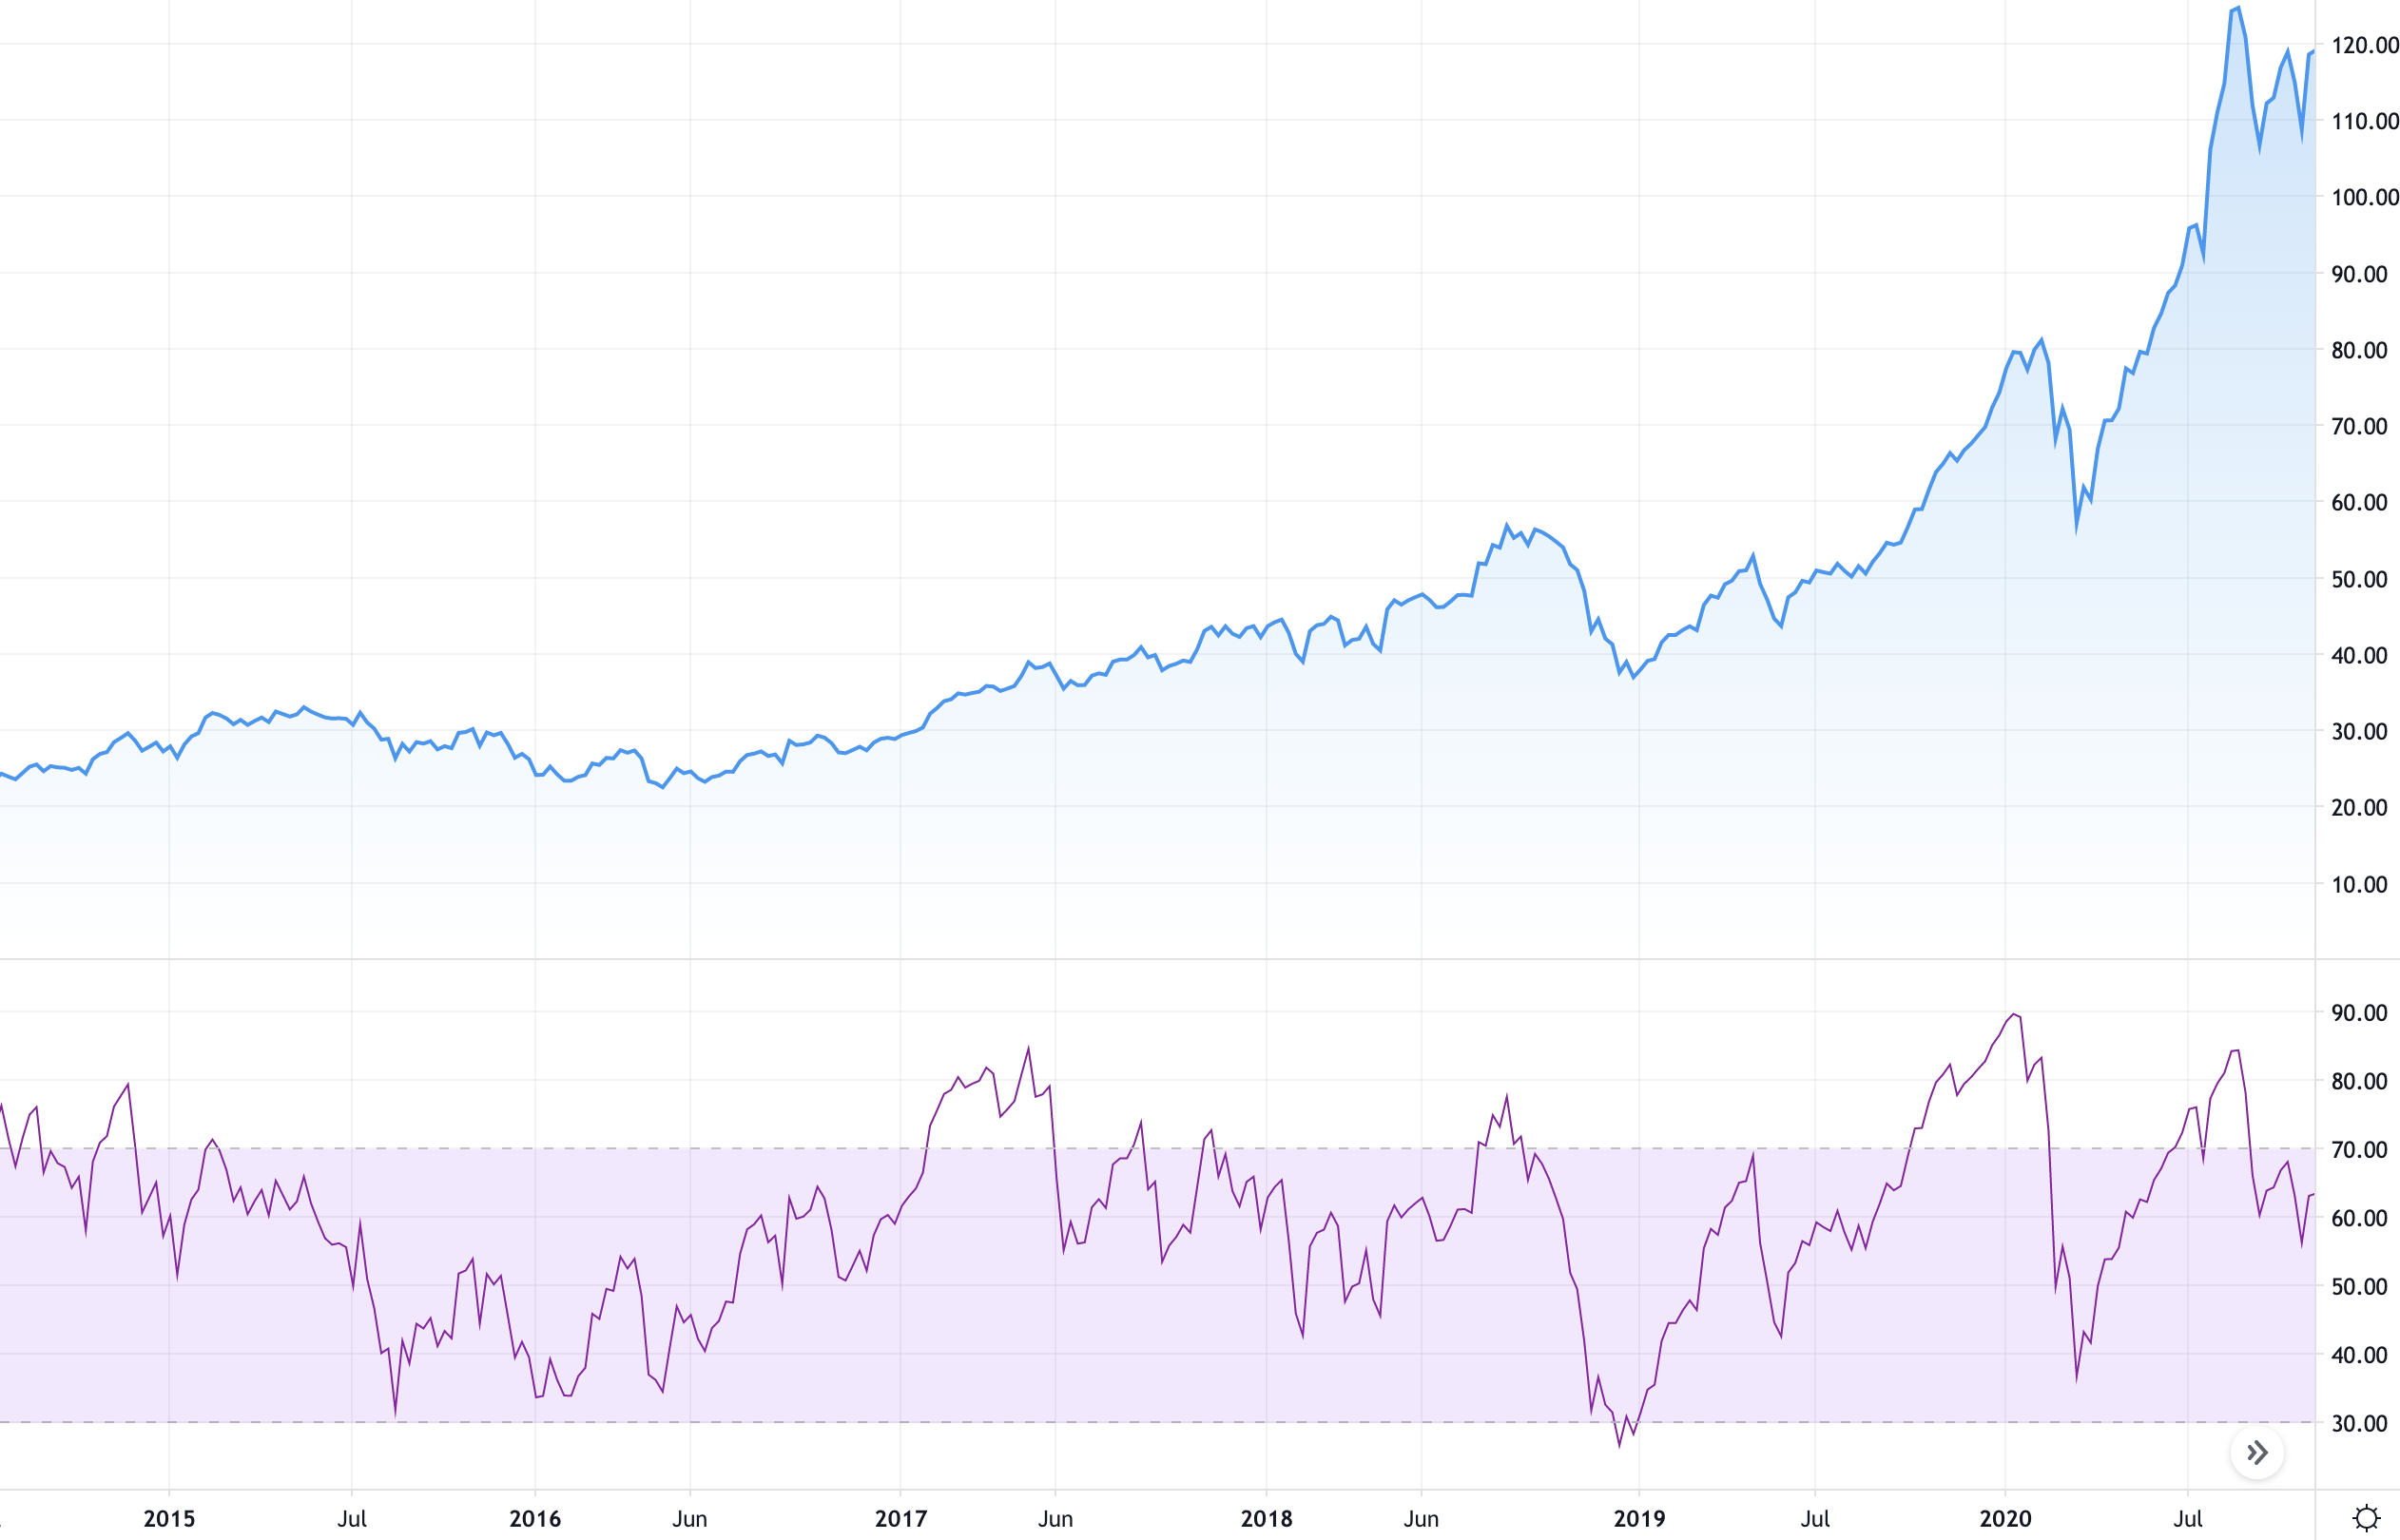
</div>

<h3>Algorithm Rules</h3>

1) Buy Apple stock when RSI reaches 40 or below\
2) Sell when it's RSI exceeds 70

In [1]:
##import all necessary libraries
#pip install *insert library name*

import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader as pdr
import datetime as dt 
import matplotlib.pyplot as plt

In [2]:
##Get stock price data
ticker = 'AAPL'

#Data time period
now = dt.datetime.now()
startyear = 2017
startmonth=1
startday=1
start = dt.datetime(startyear, startmonth, startday)

#get data from YFinance
df = pdr.get_data_yahoo(ticker, start, now)

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.277639
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.247108
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.385668
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.690971
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.944603
...,...,...,...,...,...,...
2020-11-09,121.989998,116.050003,120.500000,116.320000,154515300.0,116.320000
2020-11-10,117.589996,114.129997,115.550003,115.970001,138023400.0,115.970001
2020-11-11,119.629997,116.440002,117.190002,119.489998,112295000.0,119.489998


In [5]:
##Calculate 14 day RSI
#create the columns we need to calculate 14 day RSI
df['Up Move'] = np.nan
df['Down Move'] = np.nan
df['Average Up'] = np.nan
df['Average Down'] = np.nan
df['RS'] = np.nan
df['RSI'] = np.nan

#Calculate Up Move & Down Move
for x in range(1, len(df)):
    df['Up Move'][x] = 0
    df['Down Move'][x] = 0
    
    if df['Adj Close'][x] > df['Adj Close'][x-1]:
        df['Up Move'][x] = df['Adj Close'][x] - df['Adj Close'][x-1]
        
    if df['Adj Close'][x] < df['Adj Close'][x-1]:
        df['Down Move'][x] = abs(df['Adj Close'][x] - df['Adj Close'][x-1])  
        
#Calculate initial Average Up & Down, RS and RSI
df['Average Up'][14] = df['Up Move'][1:15].mean()
df['Average Down'][14] = df['Down Move'][1:15].mean()
df['RS'][14] = df['Average Up'][14] / df['Average Down'][14]
df['RSI'][14] = 100 - (100/(1+df['RS'][14]))

#Calculate rest of Average Up, Average Down, RS, RSI
for x in range(15, len(df)):
    df['Average Up'][x] = (df['Average Up'][x-1]*13+df['Up Move'][x])/14
    df['Average Down'][x] = (df['Average Down'][x-1]*13+df['Down Move'][x])/14
    df['RS'][x] = df['Average Up'][x] / df['Average Down'][x]
    df['RSI'][x] = 100 - (100/(1+df['RS'][x]))
    
print(df)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2017-01-03   29.082500   28.690001   28.950001   29.037500  115127600.0   
2017-01-04   29.127501   28.937500   28.962500   29.004999   84472400.0   
2017-01-05   29.215000   28.952499   28.980000   29.152500   88774400.0   
2017-01-06   29.540001   29.117500   29.195000   29.477501  127007600.0   
2017-01-09   29.857500   29.485001   29.487499   29.747499  134247600.0   
...                ...         ...         ...         ...          ...   
2020-11-09  121.989998  116.050003  120.500000  116.320000  154515300.0   
2020-11-10  117.589996  114.129997  115.550003  115.970001  138023400.0   
2020-11-11  119.629997  116.440002  117.190002  119.489998  112295000.0   
2020-11-12  120.529999  118.570000  119.620003  119.209999  103162300.0   
2020-11-13  119.669998  117.870003  119.440002  119.260002   81581900.0   

             Adj Close  

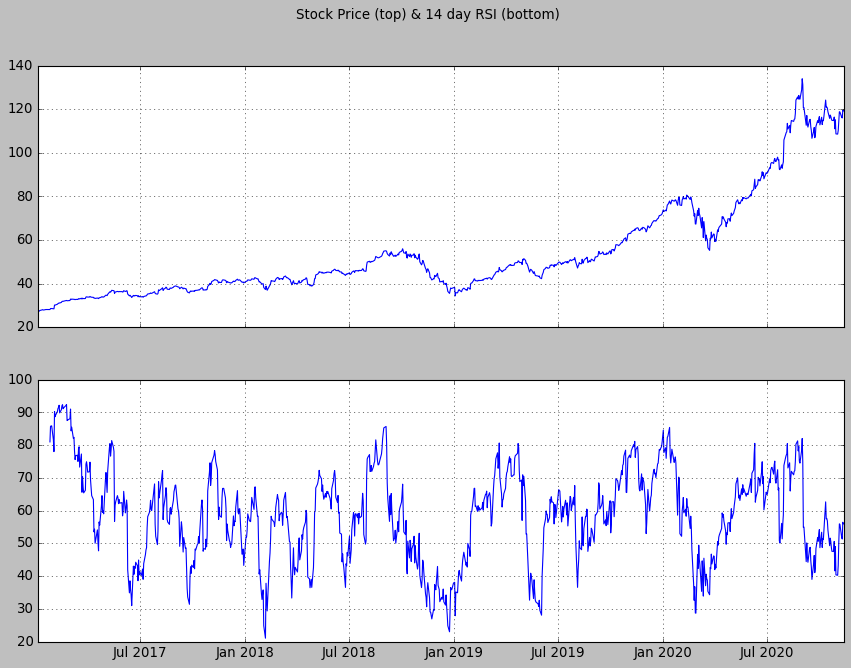

In [6]:
#Chart the stock price and RSI
plt.style.use('classic')
fig, axs = plt.subplots(2, sharex=True, figsize=(13,9))
fig.suptitle('Stock Price (top) & 14 day RSI (bottom)')
axs[0].plot(df['Adj Close'])
axs[1].plot(df['RSI'])
axs[0].grid()
axs[1].grid()

In [7]:
##Calculate the buy & sell signals
#initialize the columns that we need
df['Long Tomorrow'] = np.nan
df['Buy Signal'] = np.nan
df['Sell Signal'] = np.nan
df['Buy RSI'] = np.nan
df['Sell RSI'] = np.nan
df['Strategy'] = np.nan

#Calculate the buy & sell signals
for x in range(15, len(df)):
    
    #calculate "Long Tomorrow" column
    if ((df['RSI'][x] <= 40) & (df['RSI'][x-1]>40) ):
        df['Long Tomorrow'][x] = True
    elif ((df['Long Tomorrow'][x-1] == True) & (df['RSI'][x] <= 70)):
        df['Long Tomorrow'][x] = True
    else:
        df['Long Tomorrow'][x] = False
        
    #calculate "Buy Signal" column
    if ((df['Long Tomorrow'][x] == True) & (df['Long Tomorrow'][x-1] == False)):
        df['Buy Signal'][x] = df['Adj Close'][x]
        df['Buy RSI'][x] = df['RSI'][x]
        
    #calculate "Sell Signal" column
    if ((df['Long Tomorrow'][x] == False) & (df['Long Tomorrow'][x-1] == True)):
        df['Sell Signal'][x] = df['Adj Close'][x]
        df['Sell RSI'][x] = df['RSI'][x]
        
#calculate strategy performance
df['Strategy'][15] = df['Adj Close'][15]

for x in range(16, len(df)):
    if df['Long Tomorrow'][x-1] == True:
        df['Strategy'][x] = df['Strategy'][x-1]* (df['Adj Close'][x] / df['Adj Close'][x-1])
    else:
        df['Strategy'][x] = df['Strategy'][x-1]
        
print(df)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2017-01-03   29.082500   28.690001   28.950001   29.037500  115127600.0   
2017-01-04   29.127501   28.937500   28.962500   29.004999   84472400.0   
2017-01-05   29.215000   28.952499   28.980000   29.152500   88774400.0   
2017-01-06   29.540001   29.117500   29.195000   29.477501  127007600.0   
2017-01-09   29.857500   29.485001   29.487499   29.747499  134247600.0   
...                ...         ...         ...         ...          ...   
2020-11-09  121.989998  116.050003  120.500000  116.320000  154515300.0   
2020-11-10  117.589996  114.129997  115.550003  115.970001  138023400.0   
2020-11-11  119.629997  116.440002  117.190002  119.489998  112295000.0   
2020-11-12  120.529999  118.570000  119.620003  119.209999  103162300.0   
2020-11-13  119.669998  117.870003  119.440002  119.260002   81581900.0   

             Adj Close  

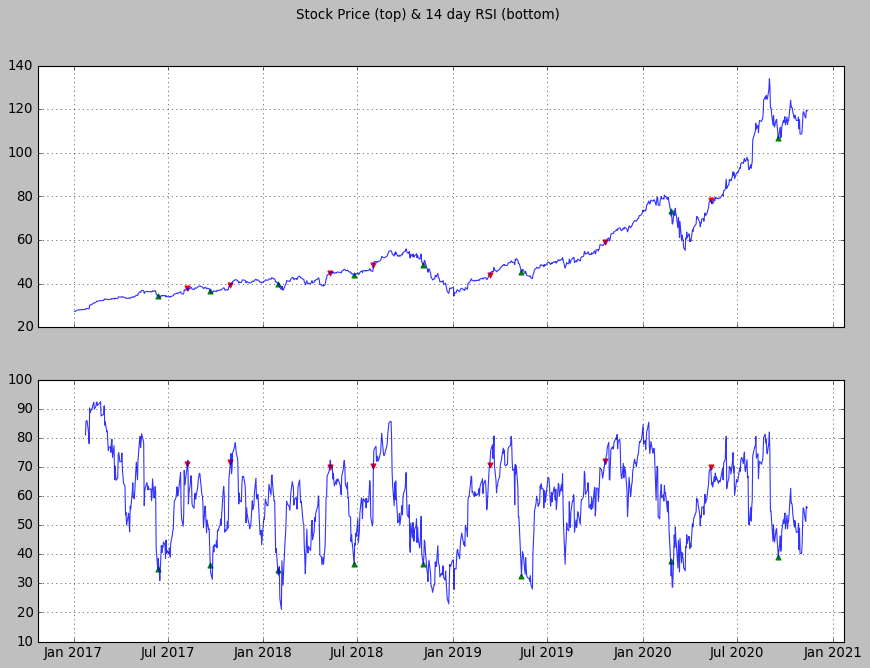

In [8]:
##Chart the buy/sell signals 
plt.style.use('classic')
fig, axs = plt.subplots(2, sharex=True, figsize=(13,9))
fig.suptitle('Stock Price (top) & 14 day RSI (bottom)')

#chart the stock close price & buy/sell signals
axs[0].scatter(df.index, df['Buy Signal'],  color = 'green',  marker = '^', alpha = 1)
axs[0].scatter(df.index, df['Sell Signal'],  color = 'red',  marker = 'v', alpha = 1)
axs[0].plot(df['Adj Close'], alpha = 0.8)
axs[0].grid()

#chart RSI & buy/sell signals
axs[1].scatter(df.index, df['Buy RSI'],  color = 'green', marker = '^', alpha = 1)
axs[1].scatter(df.index, df['Sell RSI'],  color = 'red', marker = 'v', alpha = 1)
axs[1].plot(df['RSI'], alpha = 0.8)
axs[1].grid()

In [9]:
##some performance statistics
#calculate the number of trades
trade_count = df['Buy Signal'].count()

#calculate the average profit per trade
average_profit = ((df['Strategy'][-1] / df['Strategy'][15])**(1/trade_count))-1

#calculate the average # of days per trade
total_days = df['Long Tomorrow'].count()
average_days = int(total_days / trade_count)

print('This strategy yielded ', trade_count, ' trades')
print('The average trade lasted ', average_days, ' days per trade')
print('The average profit per trade was ', average_profit*100, '%')

This strategy yielded  8  trades
The average trade lasted  120  days per trade
The average profit per trade was  9.654549275557756 %
